In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import swan_vis as swan
import yaml
from snakemake.io import expand
import cerberus
import pyranges as pr
import upsetplot

p = os.path.dirname(os.getcwd())
sys.path.append(p)

from scripts.utils import *
from scripts.vcf_utils import *
from scripts.plotting import *

In [2]:
config = load_config()
od = '../'

def proc_cfg(entry, od):
    entry = entry.replace('../../', '')
    entry = od+entry
    return entry

In [3]:
def clean_figure(ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis="x", rotation=45)

We want to find an example of a gene that is 
* PODER exclusive sig ASTU
* GWAS hit thing
* needs to have some novel transcripst

In [4]:
# browser models with the variants; 

In [5]:
# astu sig things
astu_df = pd.read_csv('/Users/fairliereese/Documents/programming/mele_lab/projects/240903_pt/data/08_allele_specifics/ASTS_results_pantrx.tsv', sep='\t')
astu_df = astu_df.loc[astu_df.significant!='ns']
astu_df['gid'] = astu_df['geneid.v'].str.split('.', expand=True)[0]
astu_df.head()

,cell_line_id,sample,population,map_reads_assemblymap,gene_variant,statistic,p.value,FDR,geneid.v,variant,transcriptid.v,refCount,altCount,totalCount,transcript_variant,significant,tested_genes,significant_genes,gid
10,GM19117,YRI5,YRI,9522208,ENSG00000116251.11_chr3_169483680_G_T,21.160000,0.0005,0.002662,ENSG00000116251.11,chr3_169483680_G_T,transcript_207329,24,1,25,transcript_207329_chr3_169483680_G_T,FDR<0.05,287,38,ENSG00000116251
11,GM19117,YRI5,YRI,9522208,ENSG00000116251.11_chr3_169483724_A_G,22.153846,0.0005,0.002662,ENSG00000116251.11,chr3_169483724_A_G,transcript_207329,25,1,26,transcript_207329_chr3_169483724_A_G,FDR<0.05,287,38,ENSG00000116251
28,GM19117,YRI5,YRI,9522208,ENSG00000130770.18_chr1_28236165_A_G,25.717736,0.0005,0.002662,ENSG00000130770.18,chr1_28236165_A_G,transcript_12375,5250,5472,10722,transcript_12375_chr1_28236165_A_G,FDR<0.05,287,38,ENSG00000130770
29,GM19117,YRI5,YRI,9522208,ENSG00000130770.18_chr1_28236165_A_G,25.717736,0.0005,0.002662,ENSG00000130770.18,chr1_28236165_A_G,transcript_12372,24,0,24,transcript_12372_chr1_28236165_A_G,FDR<0.05,287,38,ENSG00000130770
30,GM19117,YRI5,YRI,9522208,ENSG00000130770.18_chr1_28236165_A_G,25.717736,0.0005,0.002662,ENSG00000130770.18,chr1_28236165_A_G,transcript_12377,24,22,46,transcript_12377_chr1_28236165_A_G,FDR<0.05,287,38,ENSG00000130770


In [6]:
# limit to astu gwas thing
df = pd.read_csv('/Users/fairliereese/Documents/programming/mele_lab/projects/240903_pt/data/08_allele_specifics/ASTU_GWAS_PODER.tsv', sep='\t')
df.head()

# explode gene id
df['geneID'] = df.geneID.str.split('/')
df = df.explode('geneID')

print(len(astu_df.index))
astu_df = astu_df.loc[astu_df.gid.isin(df.geneID.tolist())]
print(len(astu_df.index))

# add in trait
astu_df = astu_df.merge(df[['ID', 'geneID']],
                        how='left',
                        left_on='gid',
                        right_on='geneID')
astu_df.head()

14665
6836


,cell_line_id,sample,population,map_reads_assemblymap,gene_variant,statistic,p.value,FDR,geneid.v,variant,...,refCount,altCount,totalCount,transcript_variant,significant,tested_genes,significant_genes,gid,ID,geneID
0,GM19117,YRI5,YRI,9522208,ENSG00000139428.12_chr12_109556836_A_G,58.995771,0.000500,0.002662,ENSG00000139428.12,chr12_109556836_A_G,...,48,11,59,transcript_226867_chr12_109556836_A_G,FDR<0.05,287,38,ENSG00000139428,Total cholesterol levels (MTAG),ENSG00000139428
1,GM19117,YRI5,YRI,9522208,ENSG00000139428.12_chr12_109556836_A_G,58.995771,0.000500,0.002662,ENSG00000139428.12,chr12_109556836_A_G,...,48,11,59,transcript_226867_chr12_109556836_A_G,FDR<0.05,287,38,ENSG00000139428,Concentration of very large HDL particles,ENSG00000139428
2,GM19117,YRI5,YRI,9522208,ENSG00000139428.12_chr12_109556836_A_G,58.995771,0.000500,0.002662,ENSG00000139428.12,chr12_109556836_A_G,...,36,116,152,transcript_226865_chr12_109556836_A_G,FDR<0.05,287,38,ENSG00000139428,Total cholesterol levels (MTAG),ENSG00000139428
3,GM19117,YRI5,YRI,9522208,ENSG00000139428.12_chr12_109556836_A_G,58.995771,0.000500,0.002662,ENSG00000139428.12,chr12_109556836_A_G,...,36,116,152,transcript_226865_chr12_109556836_A_G,FDR<0.05,287,38,ENSG00000139428,Concentration of very large HDL particles,ENSG00000139428
4,GM19117,YRI5,YRI,9522208,ENSG00000181991.16_chr15_88467745_C_T,20.659419,0.002999,0.014766,ENSG00000181991.16,chr15_88467745_C_T,...,173,160,333,transcript_61885_chr15_88467745_C_T,FDR<0.05,287,38,ENSG00000181991,Hip circumference adjusted for BMI,ENSG00000181991


In [7]:
# limit to novel transcripts
mt_df = pd.read_csv('../data/05_mastertable/poder_master_table_fixed_genics.tsv', sep='\t')
mt_df['pop_spec_t'] = (mt_df.population_sharing==1)&\
                      (mt_df.sample_sharing>1)
print(len(mt_df.loc[mt_df.pop_spec_t==True, 'isoform'].unique()))
# temp = mt_df[['geneid.v', 'structural_category']]
# temp['novel'] = temp.structural_category!='FSM'
# temp = temp[['geneid.v', 'novel']]
# temp = temp.groupby('geneid.v').max().reset_index().rename({'novel':'has_novel_t'},axis=1)
# temp['gid'] = temp['geneid.v'].str.split('.', expand=True)[0]

print(len(astu_df.index))
astu_df = astu_df.loc[astu_df['transcriptid.v'].isin(mt_df.loc[mt_df.structural_category!='FSM', 'isoform'].tolist())]
print(len(astu_df.index))

# merge in struct stuff
astu_df = astu_df.merge(mt_df[['isoform', 'structural_category']],
                        how='left',
                        left_on='transcriptid.v',
                        right_on='isoform')

2267
70447
47840


In [8]:
astu_df.head()

,cell_line_id,sample,population,map_reads_assemblymap,gene_variant,statistic,p.value,FDR,geneid.v,variant,...,totalCount,transcript_variant,significant,tested_genes,significant_genes,gid,ID,geneID,isoform,structural_category
0,GM19117,YRI5,YRI,9522208,ENSG00000181991.16_chr15_88467745_C_T,20.659419,0.002999,0.014766,ENSG00000181991.16,chr15_88467745_C_T,...,137,transcript_61914_chr15_88467745_C_T,FDR<0.05,287,38,ENSG00000181991,Hip circumference adjusted for BMI,ENSG00000181991,transcript_61914,NIC
1,GM19117,YRI5,YRI,9522208,ENSG00000181991.16_chr15_88467745_C_T,20.659419,0.002999,0.014766,ENSG00000181991.16,chr15_88467745_C_T,...,10,transcript_61916_chr15_88467745_C_T,FDR<0.05,287,38,ENSG00000181991,Hip circumference adjusted for BMI,ENSG00000181991,transcript_61916,NIC
2,GM19117,YRI5,YRI,9522208,ENSG00000171863.15_chr17_28468275_C_T,11.000000,0.001999,0.010122,ENSG00000171863.15,chr17_28468275_C_T,...,33,transcript_106030_chr17_28468275_C_T,FDR<0.05,287,38,ENSG00000171863,Triglyceride levels in very large VLDL,ENSG00000171863,transcript_106030,NNC
3,GM19117,YRI5,YRI,9522208,ENSG00000171863.15_chr17_28468275_C_T,11.000000,0.001999,0.010122,ENSG00000171863.15,chr17_28468275_C_T,...,33,transcript_106030_chr17_28468275_C_T,FDR<0.05,287,38,ENSG00000171863,Ratio of triglycerides to phosphoglycerides,ENSG00000171863,transcript_106030,NNC
4,GM19117,YRI5,YRI,9522208,ENSG00000145287.12_chr4_83090803_A_G,19.577926,0.001499,0.007784,ENSG00000145287.12,chr4_83090803_A_G,...,65,transcript_331391_chr4_83090803_A_G,FDR<0.05,287,38,ENSG00000145287,Systemic lupus erythematosus,ENSG00000145287,transcript_331391,NNC


In [9]:
astu_df.to_csv('astu_gwas_novel_table.tsv', sep='\t')

In [10]:
# get a parseabe table for variants

In [11]:
temp = astu_df[['transcript_variant', 'sample', 'cell_line_id', 'population', 
         'refCount', 'altCount', 'transcriptid.v', 'geneid.v']]
print(len(temp.index))
temp = temp.drop_duplicates()
print(len(temp.index))     

47840
4566


In [12]:
temp[['chr', 'pos', 'ref', 'alt']] = temp.transcript_variant.str.rsplit('_', expand=True, n=3)
temp['chr'] = temp['chr'].str.rsplit('_', expand=True, n=1)[1]
temp.head()

,transcript_variant,sample,cell_line_id,population,refCount,altCount,transcriptid.v,geneid.v,chr,pos,ref,alt
0,transcript_61914_chr15_88467745_C_T,YRI5,GM19117,YRI,84,53,transcript_61914,ENSG00000181991.16,chr15,88467745,C,T
1,transcript_61916_chr15_88467745_C_T,YRI5,GM19117,YRI,2,8,transcript_61916,ENSG00000181991.16,chr15,88467745,C,T
2,transcript_106030_chr17_28468275_C_T,YRI5,GM19117,YRI,21,12,transcript_106030,ENSG00000171863.15,chr17,28468275,C,T
4,transcript_331391_chr4_83090803_A_G,YRI5,GM19117,YRI,38,27,transcript_331391,ENSG00000145287.12,chr4,83090803,A,G
5,transcript_345632_chr6_31353908_A_C,YRI5,GM19117,YRI,8,35,transcript_345632,ENSG00000234745.14,chr6,31353908,A,C


In [17]:
temp2 = temp.loc[temp.transcript_variant.str.contains('chr15_88467745')]

In [20]:
temp2

,transcript_variant,sample,cell_line_id,population,refCount,altCount,transcriptid.v,geneid.v,chr,pos,ref,alt
0,transcript_61914_chr15_88467745_C_T,YRI5,GM19117,YRI,84,53,transcript_61914,ENSG00000181991.16,chr15,88467745,C,T
1,transcript_61916_chr15_88467745_C_T,YRI5,GM19117,YRI,2,8,transcript_61916,ENSG00000181991.16,chr15,88467745,C,T
14194,transcript_61914_chr15_88467745_C_T,LWK2,GM19328,LWK,60,65,transcript_61914,ENSG00000181991.16,chr15,88467745,C,T
14195,transcript_61911_chr15_88467745_C_T,LWK2,GM19328,LWK,18,0,transcript_61911,ENSG00000181991.16,chr15,88467745,C,T
18112,transcript_61914_chr15_88467745_C_T,LWK5,GM19446,LWK,84,56,transcript_61914,ENSG00000181991.16,chr15,88467745,C,T
28511,transcript_61914_chr15_88467745_C_T,ITU2,HG03729,ITU,82,81,transcript_61914,ENSG00000181991.16,chr15,88467745,C,T
28512,transcript_61911_chr15_88467745_C_T,ITU2,HG03729,ITU,10,1,transcript_61911,ENSG00000181991.16,chr15,88467745,C,T
43568,transcript_61914_chr15_88467745_C_T,YRI2,GM18489,YRI,105,67,transcript_61914,ENSG00000181991.16,chr15,88467745,C,T
43569,transcript_61911_chr15_88467745_C_T,YRI2,GM18489,YRI,49,1,transcript_61911,ENSG00000181991.16,chr15,88467745,C,T
43570,transcript_61916_chr15_88467745_C_T,YRI2,GM18489,YRI,6,5,transcript_61916,ENSG00000181991.16,chr15,88467745,C,T


In [16]:
astu_df.loc[astu_df.transcript_variant.str.contains('chr15_88467745')][['significant']]


,significant
0,FDR<0.05
1,FDR<0.05
14194,FDR<0.05
14195,FDR<0.05
18112,FDR<0.05
28511,FDR<0.05
28512,FDR<0.05
43568,FDR<0.05
43569,FDR<0.05
43570,FDR<0.05


In [46]:
temp2 = temp2[['sample',	'cell_line_id',	'population',	'geneid.v',	'chr', 'pos', 'ref', 'alt']]
print(len(temp2.index))
temp2 = temp2.drop_duplicates()
print(len(temp2.index))

813
813


In [47]:
temp2.to_csv('astu_example_config.tsv', sep='\t')

## What examples of these are highly-reproducible between samples?

In [51]:
temp2 = temp[['transcript_variant', 'sample']].groupby('transcript_variant').nunique().reset_index().rename({'sample':'n_sample'}, axis=1)
temp2 = temp2.sort_values(by='n_sample', ascending=False)

In [54]:
temp2.to_csv('astu_example_high_sharing.tsv', sep='\t')

In [53]:
len(temp['sample'].unique())

30

In [60]:
temp['total_count'] = temp['refCount']+temp['altCount']

In [58]:
curr_var = 'transcript_347509_chr6_33065128_T_C'
temp.loc[temp.transcript_variant == curr_var, 'sample'].unique()

array(['HAC1', 'HAC6', 'LWK1', 'LWK4', 'LWK5', 'PEL4', 'PEL5', 'ITU1',
       'ITU2', 'CEU3', 'CEU4', 'CEU5', 'YRI1'], dtype=object)

In [59]:
curr_var = 'transcript_347509_chr6_33065128_T_C'
curr_sample = 'YRI1'

temp.loc[(temp.transcript_variant == curr_var)&\
         (temp['sample'] == curr_sample)]

,transcript_variant,sample,cell_line_id,population,refCount,altCount,transcriptid.v,geneid.v,chr,pos,ref,alt
43354,transcript_347509_chr6_33065128_T_C,YRI1,GM18486,YRI,3,10,transcript_347509,ENSG00000231389.8,chr6,33065128,T,C


In [56]:
curr_var = 'transcript_345640_chr6_31353908_A_C'
temp.loc[temp.transcript_variant == curr_var, 'sample'].unique()

array(['YRI5', 'YRI7', 'LWK1', 'LWK2', 'LWK5', 'PEL1', 'PEL5', 'ITU3',
       'ITU5', 'CEU1', 'CEU5', 'YRI2', 'YRI3'], dtype=object)

In [57]:
curr_var = 'transcript_345640_chr6_31353908_A_C'
curr_sample = 'YRI5'

temp.loc[(temp.transcript_variant == curr_var)&\
         (temp['sample'] == curr_sample)]

,transcript_variant,sample,cell_line_id,population,refCount,altCount,transcriptid.v,geneid.v,chr,pos,ref,alt
35,transcript_345640_chr6_31353908_A_C,YRI5,GM19117,YRI,25,34,transcript_345640,ENSG00000234745.14,chr6,31353908,A,C


In [63]:
# get high-count things w/ high sample sharing
temp3 = temp.loc[temp.transcript_variant.isin(temp2.loc[temp2.n_sample>=10, 'transcript_variant'].tolist())]
temp3 = temp3.loc[temp3.total_count >= 100]


In [90]:
temp3 = temp3.sort_values(by='total_count', ascending=False)
temp3.head(30).tail(5)

,transcript_variant,sample,cell_line_id,population,refCount,altCount,transcriptid.v,geneid.v,chr,pos,ref,alt,total_count
13128,transcript_346703_chr6_32578927_G_A,LWK1,GM19307,LWK,211,25,transcript_346703,ENSG00000196126.12,chr6,32578927,G,A,236
4908,transcript_346723_chr6_32578981_C_T,YRI7,GM19240,YRI,151,72,transcript_346723,ENSG00000196126.12,chr6,32578981,C,T,223
4728,transcript_346723_chr6_32578927_G_A,YRI7,GM19240,YRI,146,73,transcript_346723,ENSG00000196126.12,chr6,32578927,G,A,219
21161,transcript_345640_chr6_31354139_A_G,PEL1,HG01567,PEL,153,57,transcript_345640,ENSG00000234745.14,chr6,31354139,A,G,210
20936,transcript_345640_chr6_31354138_A_G,PEL1,HG01567,PEL,157,51,transcript_345640,ENSG00000234745.14,chr6,31354138,A,G,208


In [86]:
curr_var = 'transcript_345590_chr6_31354139_A_G'
curr_sample = 'HAC6'

temp.loc[(temp.transcript_variant == curr_var)&\
         (temp['sample'] == curr_sample)]

,transcript_variant,sample,cell_line_id,population,refCount,altCount,transcriptid.v,geneid.v,chr,pos,ref,alt,total_count
11550,transcript_345590_chr6_31354139_A_G,HAC6,HG00621,HAC,79,30,transcript_345590,ENSG00000234745.14,chr6,31354139,A,G,109


In [87]:
curr_var = 'transcript_345590_chr6_31354139_A_G'
curr_sample = 'YRI7'

temp.loc[(temp.transcript_variant == curr_var)&\
         (temp['sample'] == curr_sample)]

,transcript_variant,sample,cell_line_id,population,refCount,altCount,transcriptid.v,geneid.v,chr,pos,ref,alt,total_count


In [65]:
# maybe but transcript is hard to say if it is expressed...
curr_var = 'transcript_346703_chr6_32578927_G_A'
curr_sample = 'YRI7'

temp.loc[(temp.transcript_variant == curr_var)&\
         (temp['sample'] == curr_sample)]

,transcript_variant,sample,cell_line_id,population,refCount,altCount,transcriptid.v,geneid.v,chr,pos,ref,alt,total_count
4656,transcript_346703_chr6_32578927_G_A,YRI7,GM19240,YRI,517,45,transcript_346703,ENSG00000196126.12,chr6,32578927,G,A,562


                       tid sample           tpm population
55175    transcript_345590   YRI5  1.067800e+02        YRI
211050   transcript_345590   YRI6  1.099900e+00        YRI
366925   transcript_345590   YRI7  7.256610e+01        YRI
522800   transcript_345590   HAC1  2.527890e-01        HAC
678675   transcript_345590   HAC2  1.624330e-04        HAC
834550   transcript_345590   HAC3  0.000000e+00        HAC
990425   transcript_345590   HAC4  2.836090e+00        HAC
1146300  transcript_345590   HAC5  1.677830e-03        HAC
1302175  transcript_345590   HAC6  3.893740e+01        HAC
1458050  transcript_345590   LWK1  0.000000e+00        LWK
1613925  transcript_345590   MPC1  0.000000e+00        MPC
1769800  transcript_345590   LWK2  1.861920e-08        LWK
1925675  transcript_345590   LWK3  1.226370e+00        LWK
2081550  transcript_345590   LWK4  2.658300e+01        LWK
2237425  transcript_345590   LWK5  1.764090e+00        LWK
2393300  transcript_345590   AJI1  2.098540e+01        A

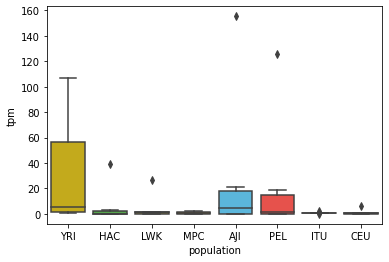

In [85]:
## Look at lr-kallisto expression of these transcripts
tid = 'transcript_345590'
plot_t_exp(df, tid)

In [80]:
f = expand(proc_cfg(config['lr']['kallisto']['quant']['merge_matrix_tpm_tsv'],od))[0]

meta = load_meta()
meta = meta.loc[meta.merged_run_mode==True]
sample_d = dict([(entry.cell_line_id, entry['sample']) \
                 for ind, entry in meta.iterrows()])


df = pd.read_csv(f, sep='\t')
df.columns = [d if d == 'transcript_id' else d.split('_')[0] for d in df.columns]
df.rename({'transcript_id':'tid'}, axis=1, inplace=True)
df.rename(sample_d, axis=1, inplace=True)
# df.set_index('tid', inplace=True)
df = df.melt(ignore_index=False, 
             id_vars=['tid'],
             var_name='sample', 
             value_name='tpm')
df = df.merge(meta[['sample', 'population']],
              how='left',
              on='sample')


In [81]:
df.head()

,tid,sample,tpm,population
0,ENST00000413811.3,YRI5,0.000000,YRI
1,transcript_6675,YRI5,0.393218,YRI
2,transcript_6676,YRI5,0.956060,YRI
3,transcript_6684,YRI5,0.196609,YRI
4,transcript_6687,YRI5,0.000000,YRI


In [84]:
def plot_t_exp(df, tid):
    c_dict, order = get_population_colors()
    temp = df.loc[df.tid==tid].copy(deep=True)
    ax = sns.boxplot(temp, y='tpm', x='population',
                     palette=c_dict)
    print(temp)